### California Housing Prediction

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

#### Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

#### Project Tasks

1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

#### Insights

1. Data: Outliers exist in the data for the following columns: total_rooms, total_bedrooms, popula- tion, households, median_income, and median_house_value
2. For the purpose of this project the entire dataset will be used
3. Linear regression using all the features in the data gave:
   a. RMSE of 71098.70 (rounded to 2 decimal points)
   b. R Sqaure of 0.614 (rounded to 3 decimal points)
4. Linear regression using only the median_income feature gave:
   a. RMSE of 84,209.01 (rounded to 2 decimal points)
   b. R Square of 0.459 (rounded to 3 decimal points)
 
Based on the output of the Linear Regression model, it will be prudent to try other models such as:
Decision Tree, Random Forest, etc to see which is the best model for this dataset.





### Step 1: Import the required libraries

In [5]:
 # Import the required libraries
    
import numpy as np
import pandas as pd
import seaborn as sns 
from math import sqrt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Step 2: Import the California Housing Data and view the dataset (first few rows)

In [6]:
# Import the data and generate a dataframe of the data

cal_housing_data = pd.read_excel('1553768847_housing.xlsx') 
cal_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Step 3: Assess the data central measures of tendency

In [7]:
# Use the .describe() to get the central measures of tendency

cal_housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Step 4: Check the number of unique values for the categorical variable ’ocean_proximity’

In [8]:
cal_housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Step 5: Check the basic values of size and shape of the dataset

In [9]:
print(cal_housing_data.shape) 
print(cal_housing_data.size)

(20640, 10)
206400


### Step 6: Check for null values and missing data

In [10]:
# Check for null values and missing data

cal_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [11]:
 # Check for missing values
# There are 207 missing vlaues for the feature - total_bedrooms.

 cal_housing_data.isnull().sum()
 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Step 7: Visulaize all the key features in a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f849a57b710>,
      dtype=object)

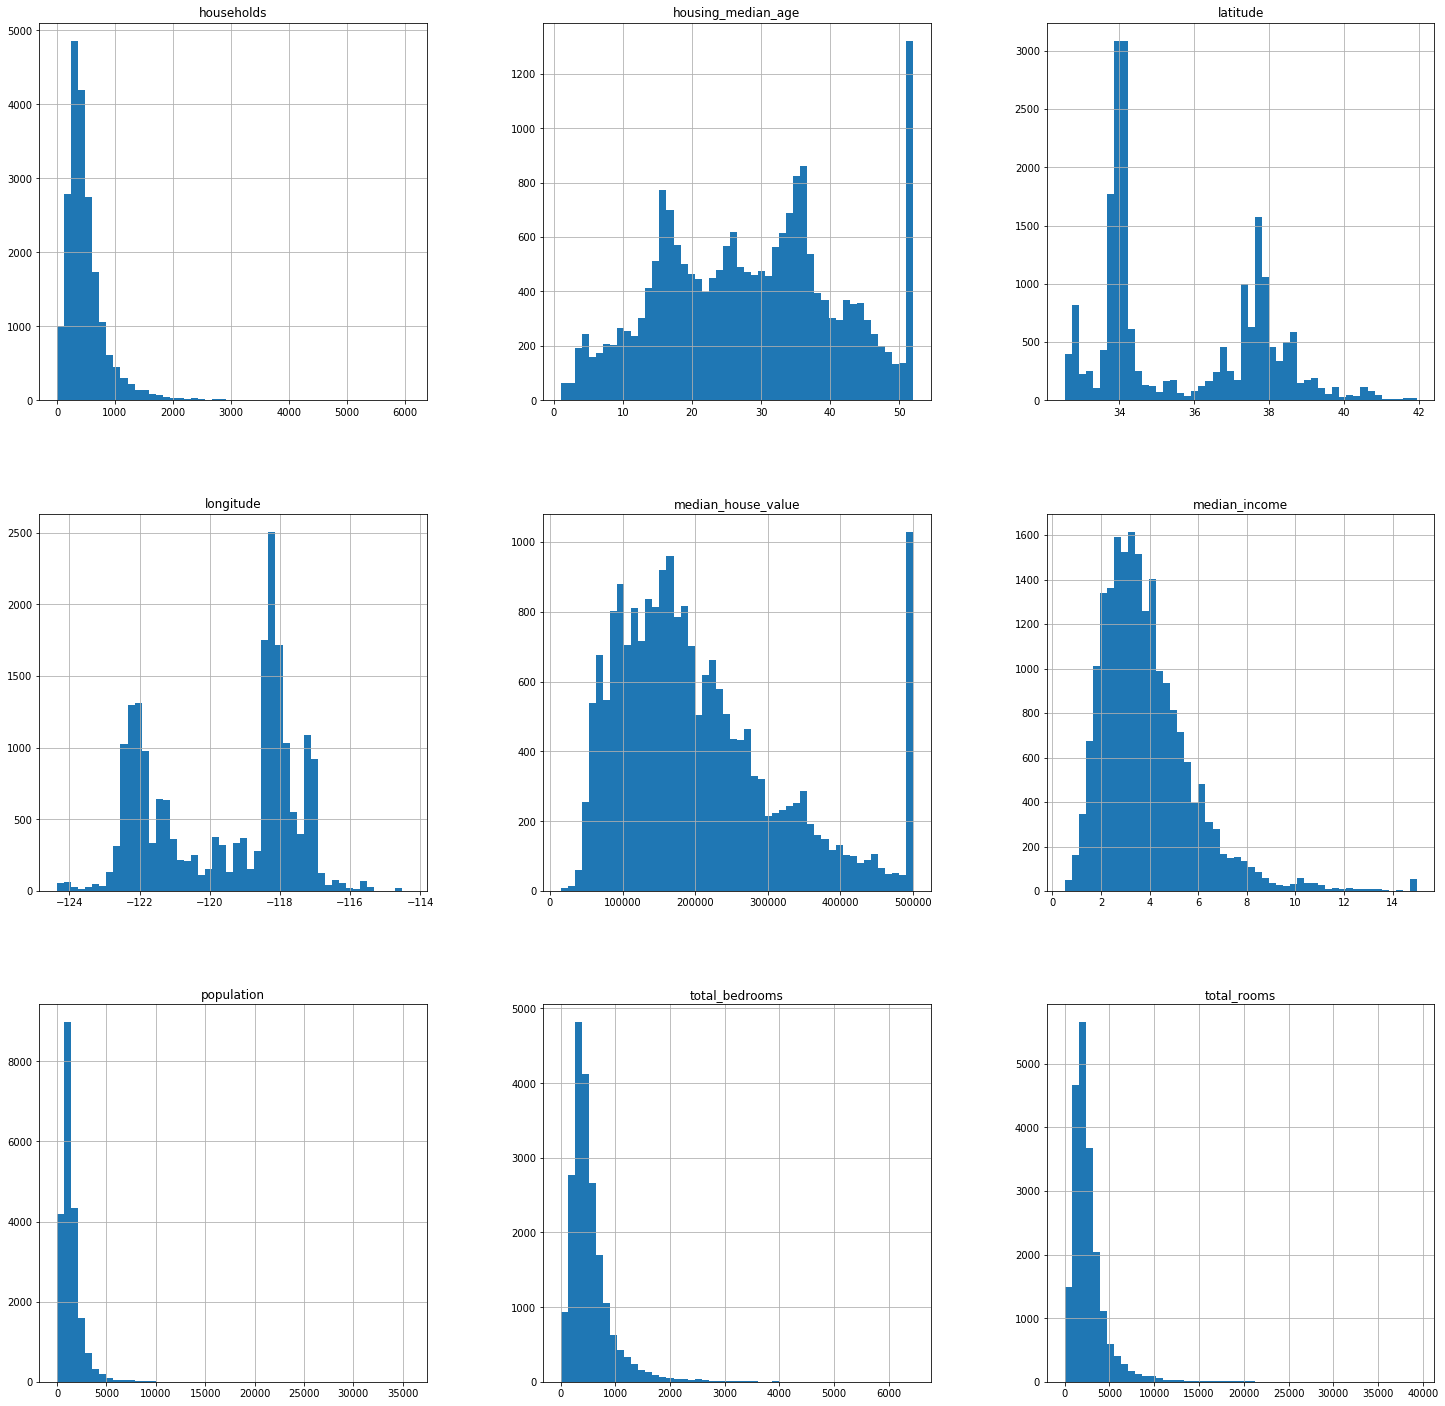

In [12]:
# Visualize the data

cal_housing_data.hist(figsize=(25,25),bins=50)

### Step 8: Check outliers for each column

Insights:
1. Outliers exist in the data for the following columns: total_rooms, total_bedrooms, popula- tion, households, median_income, and median_house_value
2. For the purpose of this project the entire dataset will be used

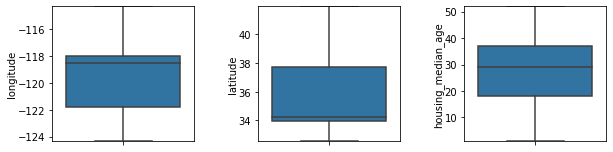

In [19]:
# Check for outliers in the columns: longitude, latitude and housing_median_age

features_cal_housing_1 = ['longitude', 'latitude',  'housing_median_age']
fig, axes = plt.subplots(1, len(features_cal_housing_1),figsize = (9, len(features_cal_housing_1))) 
fig.tight_layout(pad=3.0)
for i, col in enumerate(features_cal_housing_1):
    ax = sns.boxplot(y=cal_housing_data[col], ax=axes.flatten()[i]) 
    ax.set_ylim(cal_housing_data[col].min(), cal_housing_data[col].max()) 
    ax.set_ylabel(col, labelpad= 0.5)
plt.show()

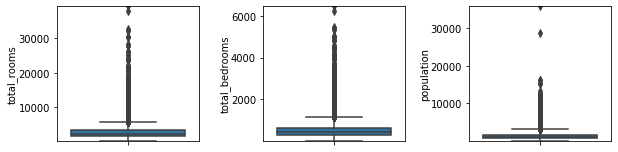

In [23]:
 # Check for outliers in the columns: total_rooms, total_bedrooms and population
features_cal_housing_2= ['total_rooms', 'total_bedrooms',
              'population']
fig, axes = plt.subplots(1, len(features_cal_housing_2),figsize=(9, len(features_cal_housing_2))) 
fig.tight_layout(pad=3.0)
for i, col in enumerate(features_cal_housing_2):
    ax = sns.boxplot(y=cal_housing_data[col], 
    ax=axes.flatten()[i]) 
    ax.set_ylim(cal_housing_data[col].min(), cal_housing_data[col].max()) 
    ax.set_ylabel(col, labelpad= 0.5)
plt.show()

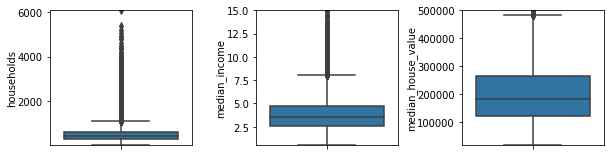

In [24]:
 # Check for outliers in the columns: households, median_income and␣ 􏰀→median_house_value
features_cal_housing_3 = ['households', 'median_income','median_house_value']
fig, axes = plt.subplots(1, len(features_cal_housing_3),figsize=(9,len(features_cal_housing_3))) 
fig.tight_layout(pad=3.0)
for i, col in enumerate(features_cal_housing_3):
    ax = sns.boxplot(y=cal_housing_data[col], 
    ax=axes.flatten()[i]) 
    ax.set_ylim(cal_housing_data[col].min(), cal_housing_data[col].max()) 
    ax.set_ylabel(col, labelpad= 0.5)
plt.show()

### Step 9: Convert the ocean_proximity feature from categorical to numeric using LabelEncoder

In [25]:
 # Use LabelEncoder to convert categorical values to numerical values
lb_make = LabelEncoder() 
cal_housing_data['ocean_proximity'] = lb_make.fit_transform(cal_housing_data["ocean_proximity"]) 
cal_housing_data.describe() 
cal_housing_data['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

### Step 10: Split the dataset into Features(X) and Response (target(Y))

In [26]:
 # Split the dataset into features and target
    
housing_features = cal_housing_data.drop("median_house_value",axis=1) 
housing_target = cal_housing_data.iloc[:, -1] 
print(housing_features.shape)
print(housing_target.shape)

(20640, 9)
(20640,)


### Step 11: Split the dataset into test and training data (80/20 split)

In [37]:
#Split the dataset into training and test set

X_train,X_test,Y_train,Y_test = train_test_split(housing_features,housing_target,test_size=0.2,random_state = 42)
print(X_train.head())
print(X_test.head())
print(Y_train.head())
print(Y_test.head())
print("X_train shape {} and size {}".format(X_train.shape,X_train.size)) 
print("X_test shape {} and size {}".format(X_test.shape,X_test.size)) 
print("Y_train shape {} and size {}".format(Y_train.shape,Y_train.size)) 
print("Y_test shape {} and size {}".format(Y_test.shape,Y_test.size))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                  33         3126           627.0   
8267     -118.16     33.77                  49         3382           787.0   
17445    -120.48     34.66                   4         1897           331.0   
14265    -117.11     32.69                  36         1421           367.0   
2271     -119.80     36.78                  43         2382           431.0   

       population  households  median_income  ocean_proximity  
14196        2300         623         3.2596                4  
8267         1314         756         3.8125                4  
17445         915         336         4.1563                4  
14265        1418         355         1.9425                4  
2271          874         380         3.5542                1  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                  25         1505   

In [38]:
# Check the data set

X_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,4128.00000,4128.00000,4128.000000,4128.000000,3921.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.51936,35.58671,28.764293,2610.796269,535.233104,1421.571705,497.750727,3.830338,1.192345
std,1.99447,2.13276,12.518304,2209.359101,431.299704,1114.023136,387.770570,1.881515,1.438108
min,-124.19000,32.54000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,0.000000
25%,-121.69000,33.93000,18.000000,1420.000000,294.000000,781.000000,278.000000,2.548500,0.000000
50%,-118.47000,34.23000,29.000000,2110.000000,428.000000,1160.000000,406.000000,3.500000,1.000000
75%,-117.99000,37.70000,37.000000,3099.250000,643.000000,1722.000000,598.000000,4.645925,1.000000
max,-114.58000,41.81000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,4.000000


### Step 12: Impute the missing valaues for total bedrooms by replacing them with the mean of the split datasets (note: Imputation is performed only after the data set has been split into the test and the training dataset)

In [39]:
# Impute missing values for the total bedrooms separately on the X_test and the␣ 􏰀→X_train datasets
# Check if the missing values have been replaced by mean

from sklearn.impute import SimpleImputer # Impute X_train missing values

imputer = SimpleImputer(strategy = "mean")
imputer.fit(X_train.iloc[:,4:5])
X_train.iloc[:,4:5] = imputer.transform(X_train.iloc[:,4:5]) 
X_train.isnull().sum() 
X_train['total_bedrooms'].value_counts()

# Impute X_test missing values

imputer.fit(X_test.iloc[:,4:5])
X_test.iloc[:,4:5] = imputer.transform(X_test.iloc[:,4:5]) 
X_test.isnull().sum() 
X_test['total_bedrooms'].value_counts()

535.233104     207
362.000000      13
300.000000      13
343.000000      13
301.000000      13
              ... 
800.000000       1
51.000000        1
134.000000       1
1856.000000      1
30.000000        1
Name: total_bedrooms, Length: 1179, dtype: int64

### Step 13: Standardize the data using Standard Scalar

In [40]:
# Standardize the data so that all the features are scaled.

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train) 
X_test = std_scaler.transform(X_test)

# Check the first few rows and all the columns of the transformed data

print("X-Training data") 
print(X_train[0:5,:]) 
print("X-Test data") 
print(X_test[0:5,:])

X-Training data
[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
X-Test data
[[ 0.28534728  0.1951     -0.28632369 -0.52286157 -0.00778948 -0.03030109
  -0.37008673 -1.15508475 -0.1124266 ]
 [ 0.06097472 -0.23549054  0.11043502  0.13841528 -0.00778948  0.12185077
   0.220532   -0.70865905 -0.1124266 ]
 [-1.42487026  1.00947776  1.85617335  0.54630997 -0.00778948 -0.10241931
   1.21539643 -0.21040155  1.29981228]
 [ 0.42994293 -0.63799909 -0.92113763  0.18808002 -0.00778948  0.24

### Step 14: Linear Regression Modeling

In [41]:
# Create the lineReg Estimator

lineReg = LinearRegression() 
lineReg.fit(X_train, Y_train)
y_predict = lineReg.predict(X_test) 
y_predict

array([ 75309.20934389, 166112.15855771, 264444.09503695, ...,
       439690.1127737 , 130408.05181885, 175513.56755484])

In [42]:
# Calculate the Root Mean Squared Error and the R Square value

print(np.sqrt(metrics.mean_squared_error(Y_test, y_predict))) 
print((r2_score(Y_test,y_predict)))

71098.69801058705
0.6142406727412271


### Plot the actual vs. the predicted values and see the fit line

<Figure size 1152x576 with 0 Axes>

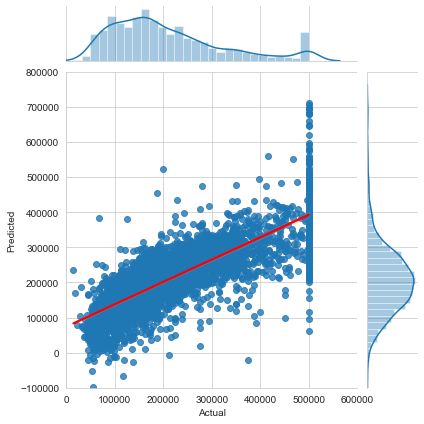

In [43]:
# Generate the jointplot to see the beahvior of the actual and predicted values
# https://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary 
# Create a data frame of the actual and predicted values

compare_values = pd.DataFrame({'Actual':Y_test, 'Predicted':y_predict})

# Rounded the values to 0 decimal points

pd.set_option('precision', 0)

# reset the index of the dataframe and drop it

compare_values = compare_values.reset_index() 
compare_values = compare_values.drop(['index'],axis=1) 
compare_values

# Joint Plot in SNS

fig= plt.figure(figsize=(16,8)) 
sns.set_style("whitegrid", {'axes.grid' : True}) 
sns.jointplot(x ='Actual',y ='Predicted',data = compare_values,kind = "reg", xlim=(0,600000), ylim=(-100000,800000), joint_kws = {'line_kws':{'color':'red'}})

### Step 15: Performing Linear Regression with only one independent variable (median_income)

In [45]:
# Generating a new dataset by dropping off all the columns except 'median_income', 'median_house_value'
# Create a list of all the columns which need to be dropped

exclude_columns = ['longitude', 'latitude','housing_median_age', 'total_rooms','total_bedrooms', 'population','households', 'ocean_proximity']

# Dropping these columns from the dataset to create a new dataset
housing_med = housing_features.drop(exclude_columns, axis = 1) 
housing_med.shape

# housing_target remains the same since no modifications are performed on this set


(20640, 1)

### Step 16: Split this new dataset into train and test dataset

In [46]:
# median_income column from the independent variables (from X_train and X_test)
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(housing_med,housing_target,test_size=0.2,random_state = 42)
print(X_train2.head())
print(X_test2.head())
print(Y_train2.head())
print(Y_test2.head())
print("X_train shape {} and size {}".format(X_train2.shape,X_train2.size)) 
print("X_test shape {} and size {}".format(X_test2.shape,X_test2.size)) 
print("Y_train shape {} and size {}".format(Y_train2.shape,Y_train2.size)) 
print("Y_test shape {} and size {}".format(Y_test2.shape,Y_test2.size))

       median_income
14196              3
8267               4
17445              4
14265              2
2271               4
       median_income
20046              2
3024               3
15663              3
20484              6
9814               4
14196    103000
8267     382100
17445    172600
14265     93400
2271      96500
Name: median_house_value, dtype: int64
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64
X_train shape (16512, 1) and size 16512
X_test shape (4128, 1) and size 4128
Y_train shape (16512,) and size 16512
Y_test shape (4128,) and size 4128


### Step 17: Linear Regression Modeling with only one independent variable

In [47]:
# Create the lineReg Estimator

lineReg1 = LinearRegression() 
lineReg1.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Predict the Y values using the X_test2 data

y_predict2 = lineReg1.predict(X_test2) 
y_predict2

array([114958.91676996, 150606.88213964, 190393.71844449, ...,
       431500.77230409, 161245.49973085, 193412.95560084])

In [49]:
# Calculate the RMSE and the R Square value
print(np.sqrt(metrics.mean_squared_error(Y_test2, y_predict2))) 
print((r2_score(Y_test2,y_predict2)))

84209.01241414454
0.45885918903846656


### Step 18: Plot the actual vs. predicted values and the fit line

<Figure size 1152x576 with 0 Axes>

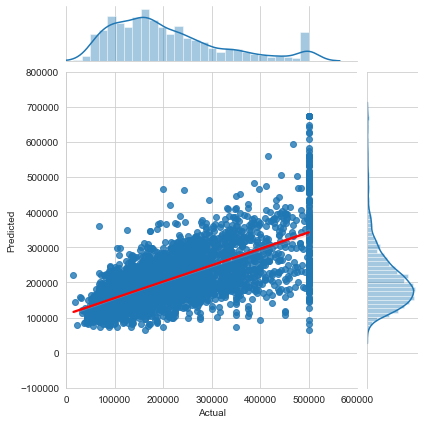

In [51]:
# https://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary
# Create a data frame of the actual and predicted values

compare_values = pd.DataFrame({'Actual':Y_test2, 'Predicted':y_predict2}) # Rounded the values to 0 decimal points
pd.set_option('precision', 0)

# reset the index of the dataframe and drop it

compare_values = compare_values.reset_index() 
compare_values = compare_values.drop(['index'],axis=1) 
compare_values

# Joint Plot in SNS
fig= plt.figure(figsize=(16,8)) 
sns.set_style("whitegrid", {'axes.grid' : True}) 
sns.jointplot(x ='Actual',y ='Predicted',
data=compare_values,kind = "reg", xlim=(0,600000), ylim=(-100000,800000), joint_kws = {'line_kws':{'color':'red'}})

### Step 19: Plot the fitted model for training data as well as for test data

This is to check if the fitted model satisfies the test data

Text(0.5, 1.0, 'Actual vs. Predicted Median House Values on Training Dataset')

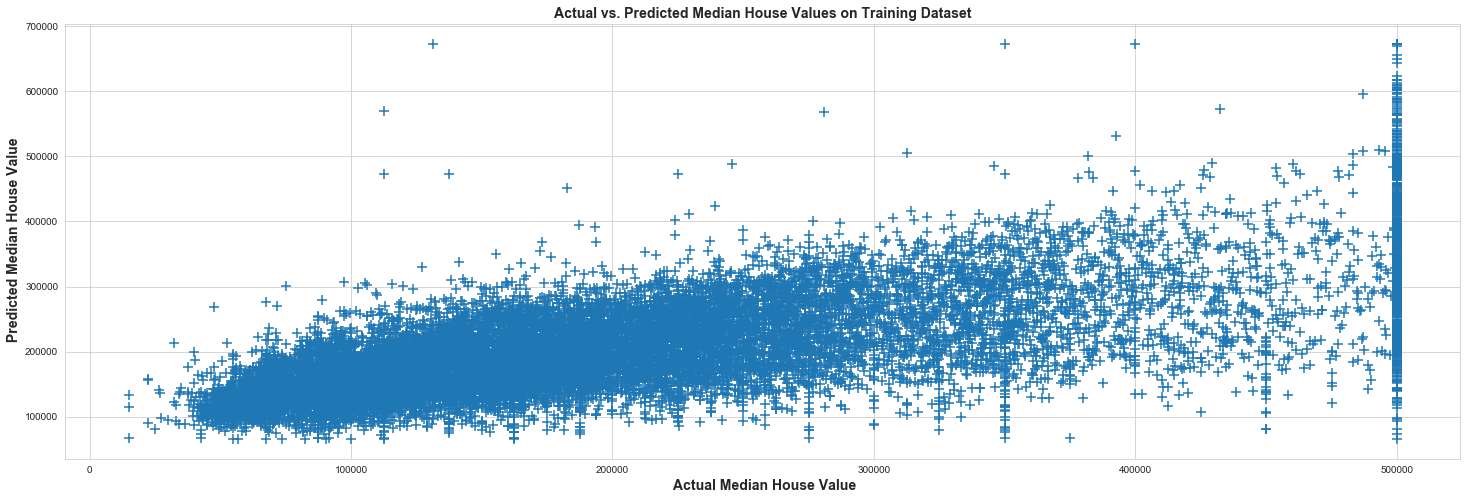

In [62]:
# Actual Training Data vs. Predicted Training Data

training_data_figure = plt.figure(figsize=(25,8)) 
plt.scatter(Y_train2,lineReg1.predict(X_train2),marker="+",s=100)
plt.xlabel(" Actual Median House Value", size = 14, weight = 'bold') 
plt.ylabel(" Predicted Median House Value", size = 14, weight = 'bold')
plt.title("Actual vs. Predicted Median House Values on Training Dataset", size = 14, weight = 'bold')

Text(0.5, 1.0, 'Actual vs. Predicted Median House Values on Test Dataset')

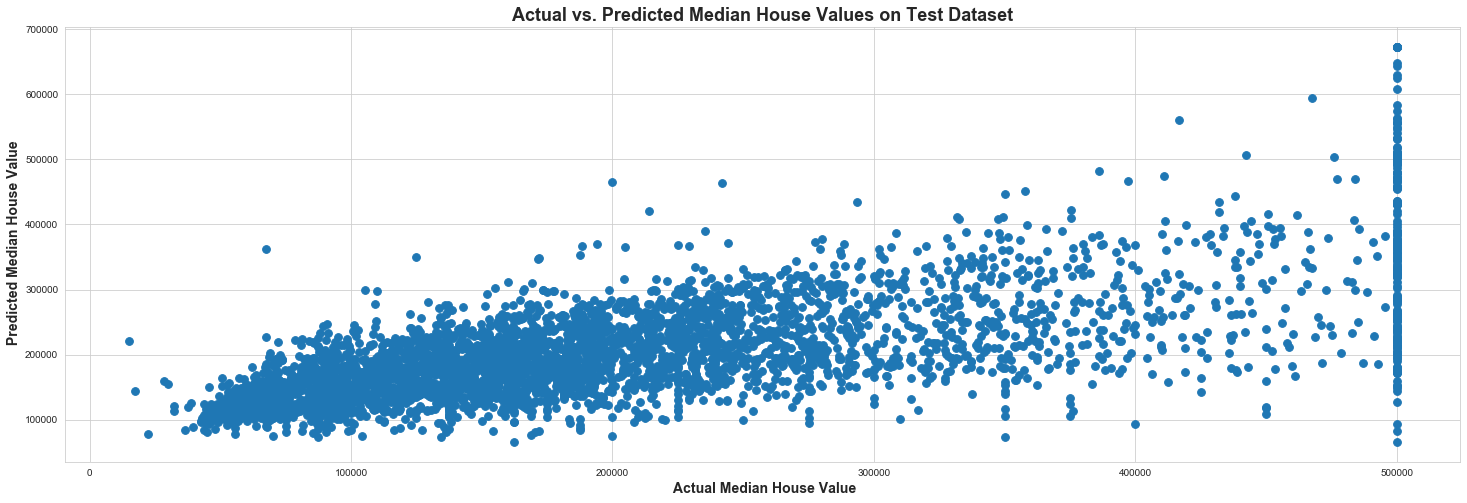

In [61]:
# Actual Test Data vs. Predicted Test Data

test_data_figure = plt.figure(figsize=(25,8)) 
plt.scatter(Y_test2,y_predict2,marker="o",s=60)
plt.xlabel(" Actual Median House Value", size = 14, weight = 'bold')
plt.ylabel(" Predicted Median House Value", size = 14, weight = 'bold')
plt.title("Actual vs. Predicted Median House Values on Test Dataset", size = 18, weight = 'bold')